In [96]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [97]:
tempos = pd.read_csv('logs/tempos.csv', delimiter=';')
temposO0 = pd.read_csv('logs/temposO0.csv', delimiter=';')

In [98]:
drop_lines_tempos = tempos[tempos['I'] == 0].index
tempos = tempos.drop(drop_lines_tempos)
tempos

,I,time,file,args
1,1,0.0030,./datasets/Aleatórios/a100.txt,['I']
2,2,0.0025,./datasets/Aleatórios/a100.txt,['I']
3,3,0.0020,./datasets/Aleatórios/a100.txt,['I']
4,4,0.0024,./datasets/Aleatórios/a100.txt,['I']
5,5,0.0019,./datasets/Aleatórios/a100.txt,['I']
...,...,...,...,...
1915,1,0.2406,./datasets/ParcialmenteOrdenados/po2000000.txt,"['B', '1000']"
1916,2,0.2410,./datasets/ParcialmenteOrdenados/po2000000.txt,"['B', '1000']"
1917,3,0.2479,./datasets/ParcialmenteOrdenados/po2000000.txt,"['B', '1000']"
1918,4,0.2504,./datasets/ParcialmenteOrdenados/po2000000.txt,"['B', '1000']"


In [99]:
# Extraindo apenas o número de instâncias usando regex
tempos['num_instancias'] = tempos['file'].str.extract(r'([0-9]+)\.txt')
tempos['nome_do_dataset'] = tempos['file'].str.extract(r'./datasets/([^/]+)/')
tempos['time'] = pd.to_numeric(tempos['time'], errors='coerce')
tempos['num_instancias'] = pd.to_numeric(tempos['num_instancias'], errors='coerce')


temposO0['num_instancias'] = temposO0['file'].str.extract(r'([0-9]+)\.txt')
temposO0['nome_do_dataset'] = temposO0['file'].str.extract(r'./datasets/([^/]+)/')
temposO0['time'] = pd.to_numeric(temposO0['time'], errors='coerce')
temposO0['num_instancias'] = pd.to_numeric(temposO0['num_instancias'], errors='coerce')


temposO0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   I                307 non-null    int64  
 1   time             288 non-null    float64
 2   file             307 non-null    object 
 3   args             307 non-null    object 
 4   num_instancias   307 non-null    int64  
 5   nome_do_dataset  307 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 14.5+ KB


KeyError: 0

<Figure size 1000x600 with 0 Axes>

In [ ]:
df_summary = (
    tempos.groupby(['nome_do_dataset','args', 'num_instancias'], as_index=False)
    .agg(media_time=('time', 'mean'))
)

df_summary['nome_do_dataset'].unique()

array(['Aleatórios', 'Decrescentes', 'Ordenados', 'ParcialmenteOrdenados'],
      dtype=object)

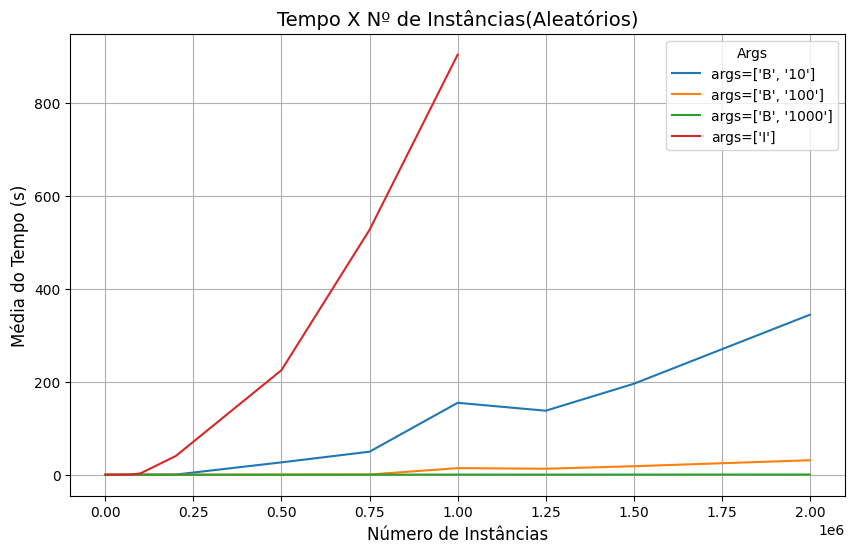

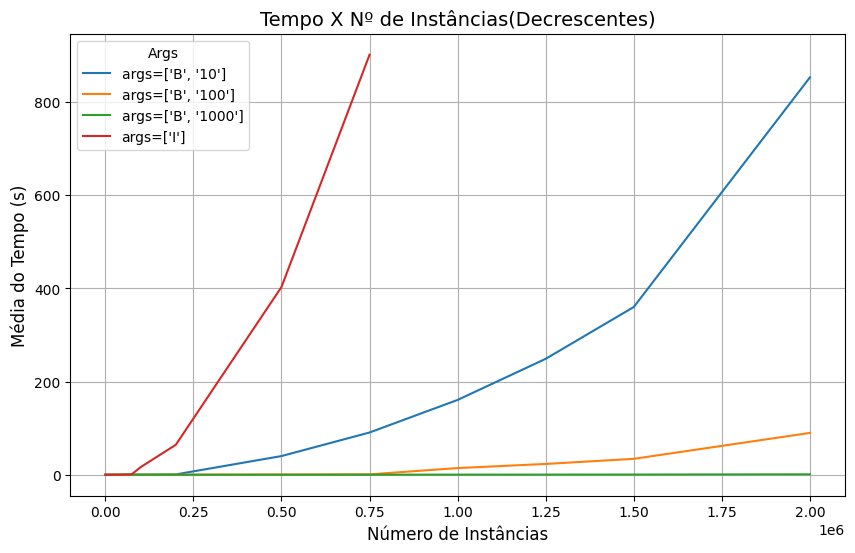

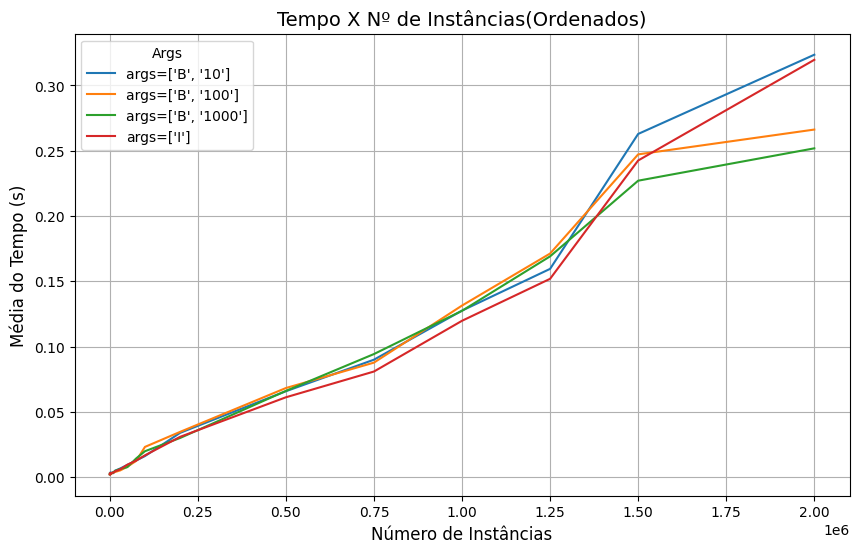

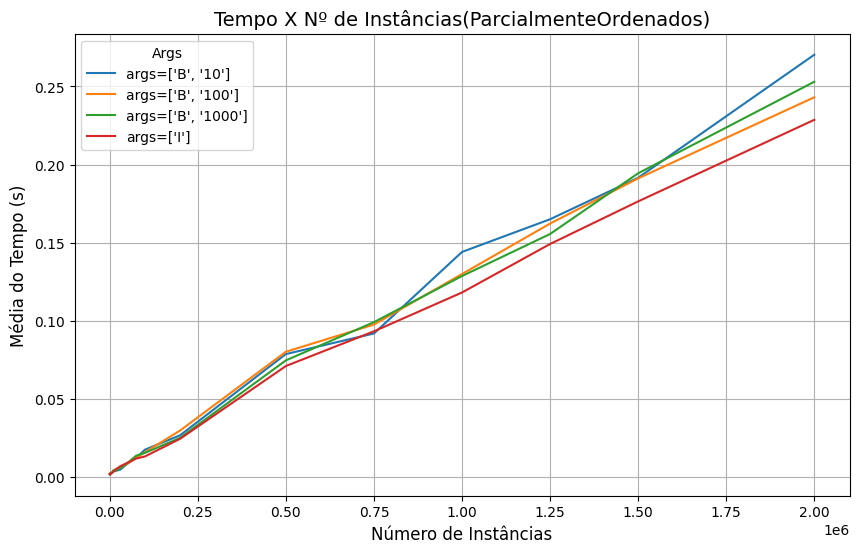

,nome_do_dataset,args,num_instancias,media_time
0,Aleatórios,"['B', '10']",100,0.00214
1,Aleatórios,"['B', '10']",200,0.00164
2,Aleatórios,"['B', '10']",500,0.00250
3,Aleatórios,"['B', '10']",1000,0.00292
4,Aleatórios,"['B', '10']",2000,0.00280
...,...,...,...,...
315,ParcialmenteOrdenados,['I'],750000,0.09332
316,ParcialmenteOrdenados,['I'],1000000,0.11816
317,ParcialmenteOrdenados,['I'],1250000,0.14918
318,ParcialmenteOrdenados,['I'],1500000,0.17644


In [ ]:

for df in df_summary['nome_do_dataset'].unique():
    plt.figure(figsize=(10, 6))
    df_img = df_summary[df_summary['nome_do_dataset'] == df]
    for arg in df_img['args'].unique():
        # Filtrando dados para o `arg` atual
        data_arg = df_img[df_img['args'] == arg]
        
        # Ordenando os dados por `num_instancias`
        data_arg = data_arg.sort_values(by='num_instancias')
        
        # Gerando o gráfico de linha
        plt.plot(data_arg['num_instancias'], data_arg['media_time'], label=f'args={arg}')

    # Personalizando o gráfico
    plt.title(f'Tempo X Nº de Instâncias({df})', fontsize=14)
    plt.xlabel('Número de Instâncias', fontsize=12)
    plt.ylabel('Média do Tempo (s)', fontsize=12)
    plt.legend(title='Args')
    plt.grid(True)

    # Exibindo o gráfico
    plt.show()


df_summary

In [101]:
df_summary2 = (
    temposO0.groupby(['nome_do_dataset','args', 'num_instancias'], as_index=False)
    .agg(media_time=('time', 'mean'))
)

df_summary2['nome_do_dataset'].unique()


# Garantir que os datasets estejam alinhados pela coluna 'nome_do_dataset'
df1 = df_summary.set_index('nome_do_dataset')
df2 = df_summary2.set_index('nome_do_dataset')

# Calculando o delta da coluna 'num_instancias'
df_delta = df1['time'] - df2['time']
df_delta = df_delta.reset_index()  # Reseta o índice para plotar

df_delta

# # Plotando o gráfico
# plt.figure(figsize=(10, 6))
# plt.bar(df_delta['nome_do_dataset'], df_delta[0], color='skyblue', label='Delta (Diferença)')
# plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)  # Linha para marcar o zero
# plt.title('Delta de Num Instâncias entre Dois Datasets')
# plt.xlabel('Nome do Dataset')
# plt.ylabel('Delta (Num Instâncias)')
# plt.xticks(rotation=45)
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

KeyError: 'time'